NAME: NIDHI ANN ALEX

REG. NO.: 21BPS1009

ASSIGNMENT 5

In [12]:
import pandas as pd
import numpy as np

In [13]:
df = pd.read_csv('/content/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**DATA PRE-PROCESSING**

Cleaning the data

In [14]:
#Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


there are no missing values so there is no need to handle missing values

In [15]:
#Check for and handle duplicates
duplicates = df.duplicated().sum()
print("\nDuplicate Rows:")
print(duplicates)



Duplicate Rows:
0


there are no duplicate rows so no handeling needed

handling outliers

In [16]:
#numerical columns for which you want to handle outliers
numerical_columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# Function to handle outliers using the IQR method
def handle_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace values below the lower bound with the lower bound and values above the upper bound with the upper bound
    data[column] = data[column].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

# Loop through numerical columns and handle outliers
for column in numerical_columns:
    handle_outliers(df, column)


In [17]:
# Check the cleaned dataset with outliers handled
print("Cleaned Dataset with Outliers Handled:")
print(df.head())


Cleaned Dataset with Outliers Handled:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                15.0                      39
1           2    Male   21                15.0                      81
2           3  Female   20                16.0                       6
3           4  Female   23                16.0                      77
4           5  Female   31                17.0                      40


In [18]:
# Encode the 'Gender' column using one-hot encoding
df = pd.get_dummies(df, columns=['Gender'], drop_first=True) #here male is 1 and female is 0

# Check the dataset with 'Gender' encoded
print("Encoded Dataset:")
print(df.head())

Encoded Dataset:
   CustomerID  Age  Annual Income (k$)  Spending Score (1-100)  Gender_Male
0           1   19                15.0                      39            1
1           2   21                15.0                      81            1
2           3   20                16.0                       6            0
3           4   23                16.0                      77            0
4           5   31                17.0                      40            0


In [19]:
#Normalization scales features to a range of [0, 1]
from sklearn.preprocessing import MinMaxScaler

# Create a Min-Max scaler
scaler = MinMaxScaler()

# Specify the columns to normalize
columns_to_normalize = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# Apply normalization to selected columns
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

# Check the normalized dataset
print("Normalized Dataset:")
print(df.head())


Normalized Dataset:
   CustomerID       Age  Annual Income (k$)  Spending Score (1-100)  \
0           1  0.019231            0.000000                0.387755   
1           2  0.057692            0.000000                0.816327   
2           3  0.038462            0.008493                0.051020   
3           4  0.096154            0.008493                0.775510   
4           5  0.250000            0.016985                0.397959   

   Gender_Male  
0            1  
1            1  
2            0  
3            0  
4            0  


In [20]:
#Standardization
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler
scaler = StandardScaler()

# Specify the columns to standardize
columns_to_standardize = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# Apply standardization to selected columns
df[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])

# Check the standardized dataset
print("Standardized Dataset:")
print(df.head())


Standardized Dataset:
   CustomerID       Age  Annual Income (k$)  Spending Score (1-100)  \
0           1 -1.424569           -1.745429               -0.434801   
1           2 -1.281035           -1.745429                1.195704   
2           3 -1.352802           -1.707083               -1.715913   
3           4 -1.137502           -1.707083                1.040418   
4           5 -0.563369           -1.668737               -0.395980   

   Gender_Male  
0            1  
1            1  
2            0  
3            0  
4            0  


data split

In [21]:
x = df.iloc[:, :-1]  # Select all columns except the last one as features
y = df.iloc[:, -1]   # Select the last column as the target variable

x = x.to_numpy()
y = y.to_numpy()

In [22]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=40)


data visualisation

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

univariate analysis

In [24]:
# Extract the 'Age' column for analysis
age_data = df['Age']

# Descriptive Statistics
summary_stats = age_data.describe()
print("Summary Statistics:\n", summary_stats)

Summary Statistics:
 count    2.000000e+02
mean    -7.549517e-17
std      1.002509e+00
min     -1.496335e+00
25%     -7.248436e-01
50%     -2.045351e-01
75%      7.284319e-01
max      2.235532e+00
Name: Age, dtype: float64


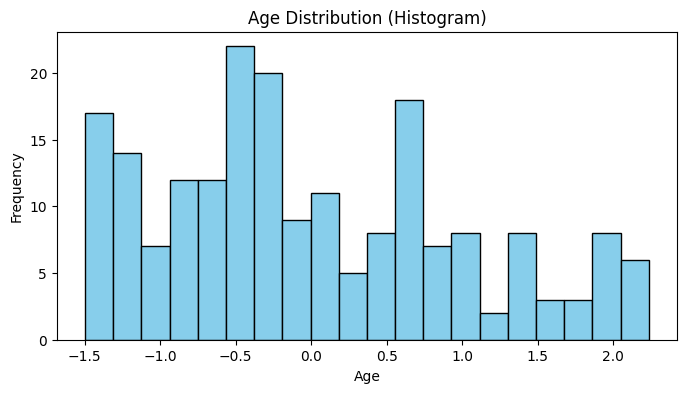

In [25]:
# Histogram
plt.figure(figsize=(8, 4))
plt.hist(age_data, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution (Histogram)')
plt.show()

<ipython-input-26-222945895494>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(age_data, color='green', shade=True)


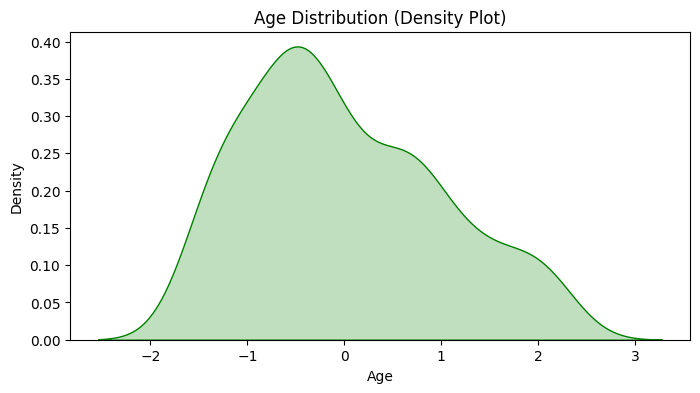

In [26]:
# Density Plot
plt.figure(figsize=(8, 4))
sns.kdeplot(age_data, color='green', shade=True)
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Age Distribution (Density Plot)')
plt.show()


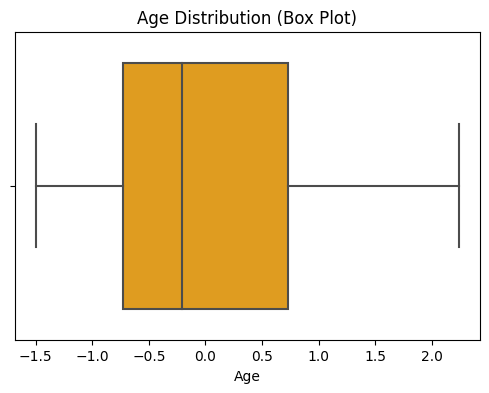

In [27]:
# Box Plot
plt.figure(figsize=(6, 4))
sns.boxplot(x=age_data, color='orange')
plt.xlabel('Age')
plt.title('Age Distribution (Box Plot)')
plt.show()

bivariate analysis

<ipython-input-30-72747dacd39b>:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x='Age', y='Annual Income (k$)', palette='viridis')


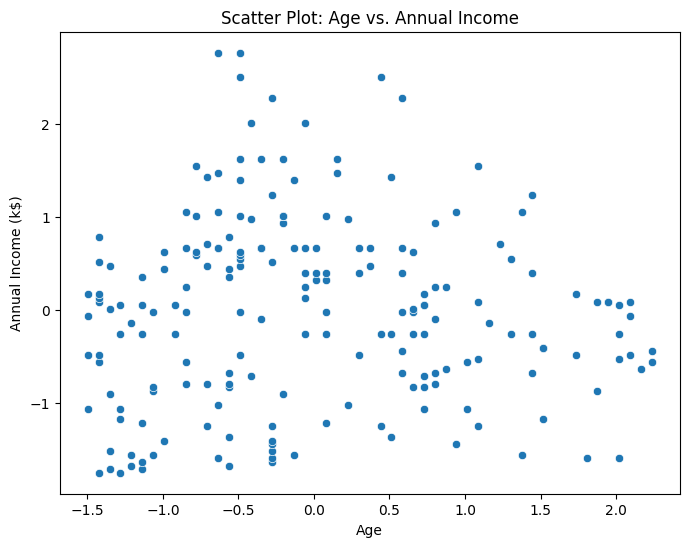

In [30]:
# Extract the two variables for analysis
income_data = df['Annual Income (k$)']

# Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Age', y='Annual Income (k$)', palette='viridis')
plt.title('Scatter Plot: Age vs. Annual Income')
plt.show()

In [31]:
# Correlation Analysis
correlation_matrix = df[['Age', 'Annual Income (k$)']].corr()
print("Correlation Matrix:\n", correlation_matrix)


Correlation Matrix:
                          Age  Annual Income (k$)
Age                 1.000000           -0.011537
Annual Income (k$) -0.011537            1.000000


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been as

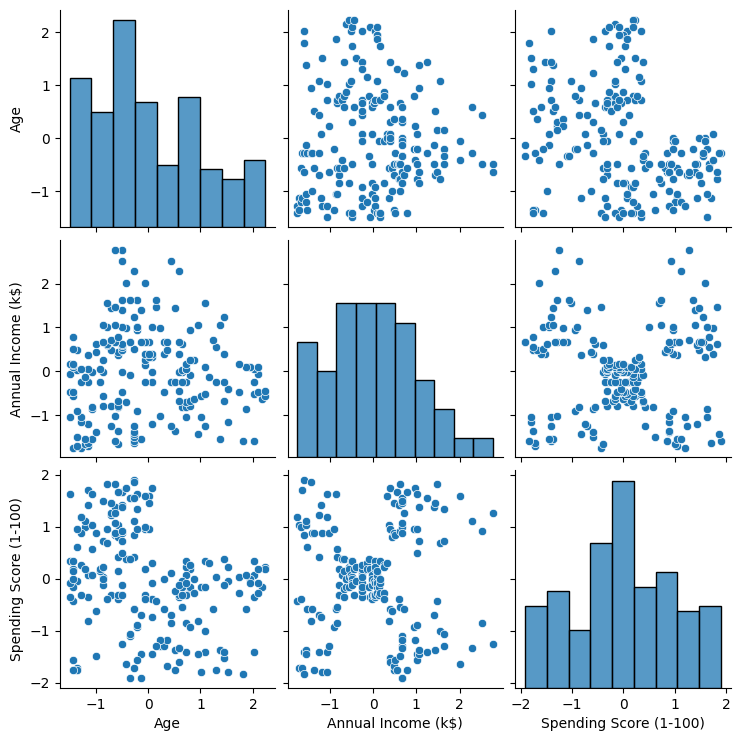

In [33]:
# Pair Plot for Multiple Variables
sns.pairplot(data=df, vars=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], palette='Set1')
plt.show()

multivariate analysis

In [34]:
# Extract relevant variables for analysis
selected_variables = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
df_selected = df[selected_variables]



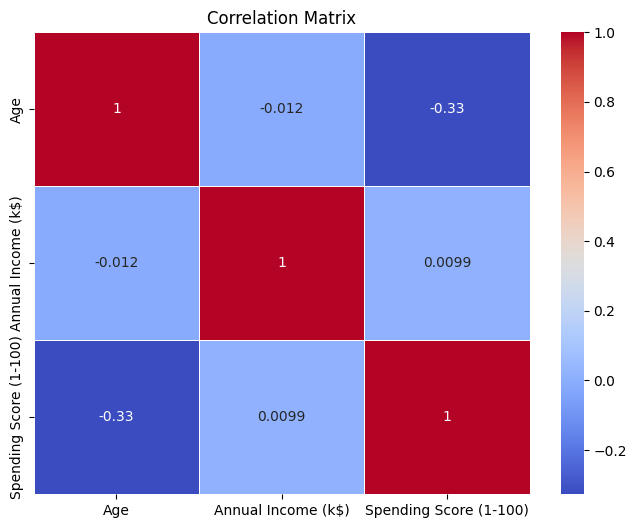

In [35]:
# Correlation Matrix
correlation_matrix = df_selected.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been as

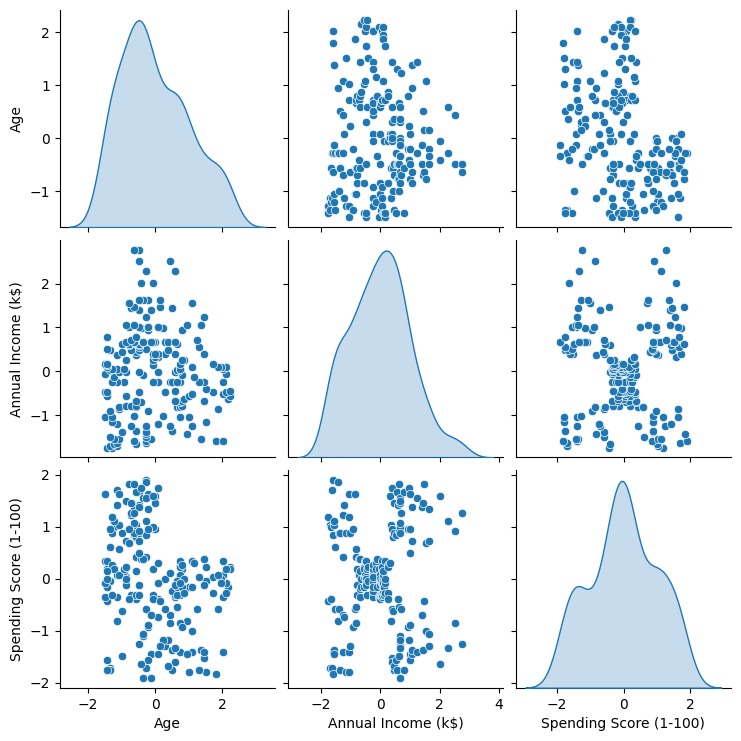

In [36]:
# Pair Plot
sns.pairplot(data=df_selected, diag_kind='kde', kind='scatter', palette='Set1')
plt.show()

k means clustering

In [43]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [44]:
# select two features for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [45]:
# Initialize lists to store silhouette scores and K values
silhouette_scores = []
k_values = range(2, 11)  # Range of K values to test

In [46]:
# Iterate through different values of K
for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    cluster_labels = kmeans.fit_predict(X)

    # Calculate the silhouette score for the current K
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

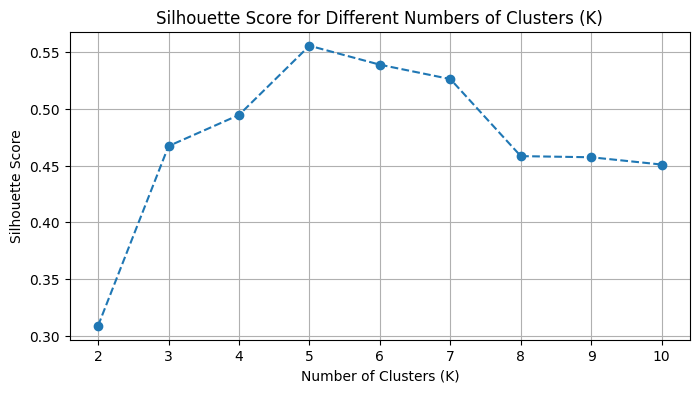

In [47]:
# Plot the silhouette scores for different K values
plt.figure(figsize=(8, 4))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Numbers of Clusters (K)')
plt.grid(True)
plt.show()

In [48]:
print(f"maximum silhouette score:{silhouette_scores.index(max(silhouette_scores))}")
# Determine the optimal K with the highest silhouette score
optimal_k = k_values[silhouette_scores.index(max(silhouette_scores))]
print(f'Optimal number of clusters (K): {optimal_k}')


maximum silhouette score:3
Optimal number of clusters (K): 5


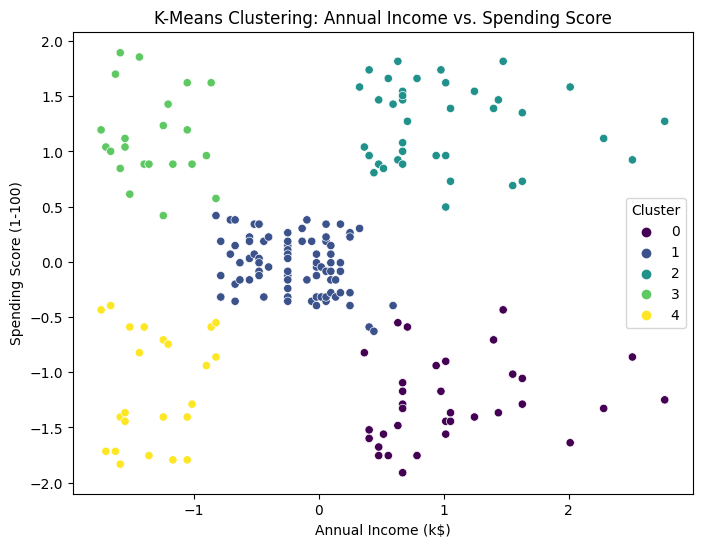

In [49]:
# Visualize the clustered data
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='viridis')
plt.title('K-Means Clustering: Annual Income vs. Spending Score')
plt.show()